#### Dataset Source
Kaggle : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data 

#### About Dataset

Sample Sales Data, Order Info, Sales, Customer, Shipping, etc., Used for Segmentation, Customer Analytics, Clustering and More. Inspired for retail analytics. This was originally used for Pentaho DI Kettle, But I found the set could be useful for Sales Simulation training.

Originally Written by María Carina Roldán, Pentaho Community Member, BI consultant (Assert Solutions), Argentina. This work is licensed under the Creative Commons Attribution-Noncommercial-Share Alike 3.0 Unported License. Modified by Gus Segura June 2014.

#### Analytics Questions
1. Total sales over the past years?
2. Which month/year have the most sales?
3. Which country has the top sales?
4. What type of products do the customers order the most?
5. Top 5 best selling products?

#### Exploratory Data Analysis

In [18]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#import data
df = pd.read_csv("Documents/PYTHON PRACTICE/Project - guided/5/sales_data_sample.csv", encoding='ISO-8859-1')

#inspect the data
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [20]:
df.iloc[:20, 10:15]

,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE
0,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818
1,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555
2,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555
3,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265
4,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386
5,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809
6,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555
7,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215
8,Motorcycles,95,S10_1678,Mini Wheels Co.,6505555787
9,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [22]:
print(f"This dataset have {df.shape[0]} rows and {df.shape[1]} columns.")

This dataset have 2823 rows and 25 columns.


In [23]:
#check duplicate
df.duplicated().sum()

0

* There are 9 numerical variables and 16 categorical variables.
* There are 4 columns(ADDRESSLINE2, STATE, POSTALCODE, TERRITORY) with missing values. But we might not use this column so we will just leave it as it is.
* There are duplicate rows or columns.
* The ORDERDATE column should have datetime datatype.

In [25]:
#create new column with parsed date

df['ORDERDATE_parsed'] = pd.to_datetime(df['ORDERDATE'])

#quick check on the date
df.loc[:20, ('ORDERDATE','ORDERDATE_parsed')]

,ORDERDATE,ORDERDATE_parsed
0,2/24/2003 0:00,2003-02-24
1,5/7/2003 0:00,2003-05-07
2,7/1/2003 0:00,2003-07-01
3,8/25/2003 0:00,2003-08-25
4,10/10/2003 0:00,2003-10-10
5,10/28/2003 0:00,2003-10-28
6,11/11/2003 0:00,2003-11-11
7,11/18/2003 0:00,2003-11-18
8,12/1/2003 0:00,2003-12-01
9,1/15/2004 0:00,2004-01-15


In [26]:
#quick look on unique values in all column
for col in df:
    print(f"Unique values in column '{col}': ")
    print(df[col].unique())
    print()

Unique values in column 'ORDERNUMBER': 
[10107 10121 10134 10145 10159 10168 10180 10188 10201 10211 10223 10237
 10251 10263 10275 10285 10299 10309 10318 10329 10341 10361 10375 10388
 10403 10417 10103 10112 10126 10140 10150 10163 10174 10183 10194 10206
 10215 10228 10245 10258 10270 10280 10291 10304 10312 10322 10333 10347
 10357 10369 10381 10391 10411 10424 10120 10210 10236 10298 10308 10339
 10374 10402 10362 10105 10119 10129 10143 10155 10167 10178 10186 10197
 10209 10222 10248 10261 10273 10283 10295 10307 10316 10325 10337 10350
 10359 10373 10384 10395 10400 10414 10114 10164 10175 10207 10217 10229
 10259 10281 10305 10313 10334 10370 10425 10108 10122 10135 10147 10169
 10181 10191 10203 10225 10238 10253 10266 10276 10287 10300 10310 10320
 10363 10389 10419 10117 10127 10142 10153 10165 10176 10185 10196 10208
 10220 10231 10247 10272 10282 10293 10306 10314 10336 10348 10371 10382
 10413 10113 10216 10189 10224 10319 10104 10230 10324 10358 10372 10160
 10170 1021

In [27]:
#run descriptive for all numerical column
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,ORDERDATE_parsed
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551,2004-05-11 00:16:49.989373056
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000,2003-01-06 00:00:00
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000,2003-11-06 12:00:00
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000,2004-06-15 00:00:00
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000,2004-11-17 12:00:00
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000,2005-05-31 00:00:00
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912,NaN


In [28]:
#run descriptive for specific numerical column
df[['QUANTITYORDERED','PRICEEACH','SALES']].describe()

,QUANTITYORDERED,PRICEEACH,SALES
count,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072
std,9.741443,20.174277,1841.865106
min,6.000000,26.880000,482.130000
25%,27.000000,68.860000,2203.430000
50%,35.000000,95.700000,3184.800000
75%,43.000000,100.000000,4508.000000
max,97.000000,100.000000,14082.800000


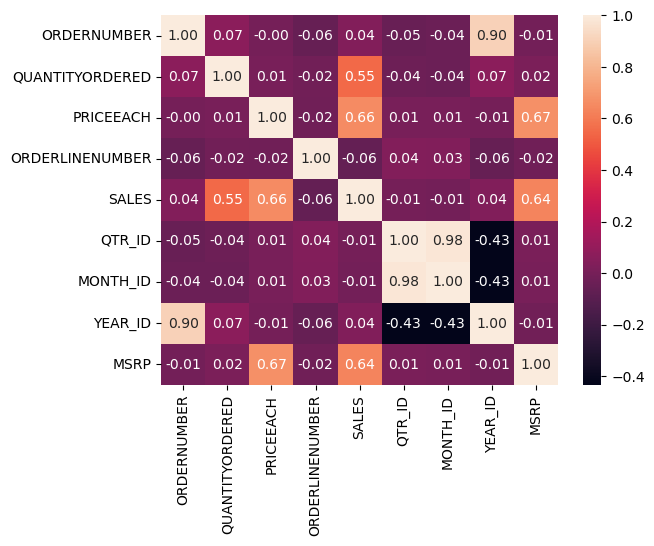

In [29]:
#import seaborn to get a heatmap corr
import seaborn as sns

corr = df.corr(numeric_only = True)
plt.figure(dpi = 100)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

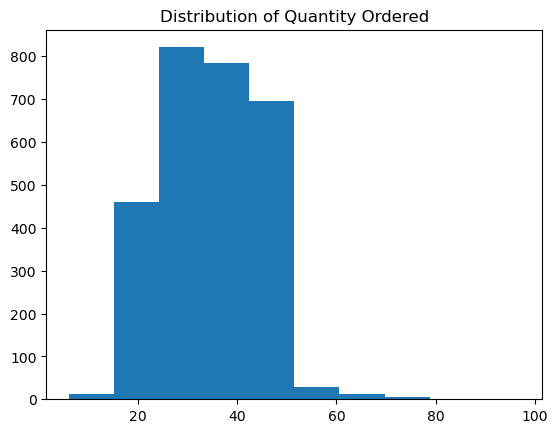

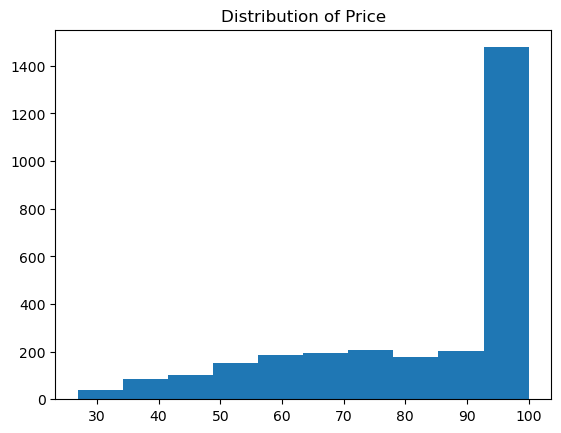

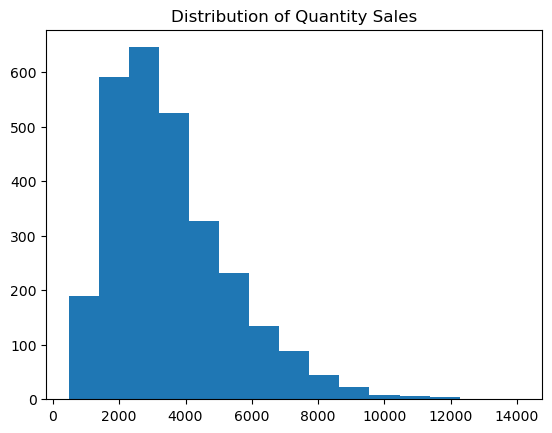

In [54]:
#Analyzing the distribution
plt.hist(df['QUANTITYORDERED'], bins=10)
plt.title('Distribution of Quantity Ordered')
plt.show()

plt.hist(df['PRICEEACH'], bins=10)
plt.title('Distribution of Price')
plt.show()

plt.hist(df['SALES'], bins=15)
plt.title('Distribution of Quantity Sales')
plt.show()

In [80]:
#Total sales over the past year
df.pivot_table(values = 'SALES', index = 'YEAR_ID', aggfunc=sum, margins=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13412\1376338393.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(values = 'SALES', index = 'YEAR_ID', aggfunc=sum, margins=True)


,SALES
YEAR_ID,
2003,3516979.54
2004,4724162.60
2005,1791486.71
All,10032628.85


In [120]:
#Total sales over the past year by country
df.pivot_table(values = 'SALES', index = 'YEAR_ID', columns='COUNTRY', aggfunc=sum, fill_value=0, margins=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13412\352006423.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(values = 'SALES', index = 'YEAR_ID', columns='COUNTRY', aggfunc=sum, fill_value=0, margins=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13412\352006423.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(values = 'SALES', index = 'YEAR_ID', columns='COUNTRY', aggfunc=sum, fill_value=0, margins=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13412\352006423.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a fu

COUNTRY,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,All
YEAR_ID,,,,,,,,,,,,,,,,,,,,
2003,253134.45,82117.88,3348.46,54609.50,99192.72,111154.51,312761.42,70053.31,0.00,140928.77,0.00,196532.6,78086.98,165686.20,405343.39,58459.92,0.00,180421.55,1305147.88,3516979.54
2004,232396.68,51694.39,80024.05,135776.09,120431.56,91575.69,555198.70,150418.78,57756.43,192235.60,149422.47,110931.1,15928.75,116039.03,483545.36,119947.57,117713.56,257656.10,1685470.69,4724162.60
2005,145091.97,68250.26,25040.11,33692.97,26012.87,126851.71,242956.40,0.00,0.00,41509.94,38745.34,0.0,0.00,6763.18,326798.17,31606.72,0.00,40802.81,637364.26,1791486.71
All,630623.10,202062.53,108412.62,224078.56,245637.15,329581.91,1110916.52,220472.09,57756.43,374674.31,188167.81,307463.7,94015.73,288488.41,1215686.92,210014.21,117713.56,478880.46,3627982.83,10032628.85


C:\Users\ACER\AppData\Local\Temp\ipykernel_13412\1186362531.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YEAR_ID', y='SALES', data=df, estimator=sum, ci=None, palette='pastel')
C:\Users\ACER\AppData\Local\Temp\ipykernel_13412\1186362531.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YEAR_ID', y='SALES', data=df, estimator=sum, ci=None, palette='pastel')


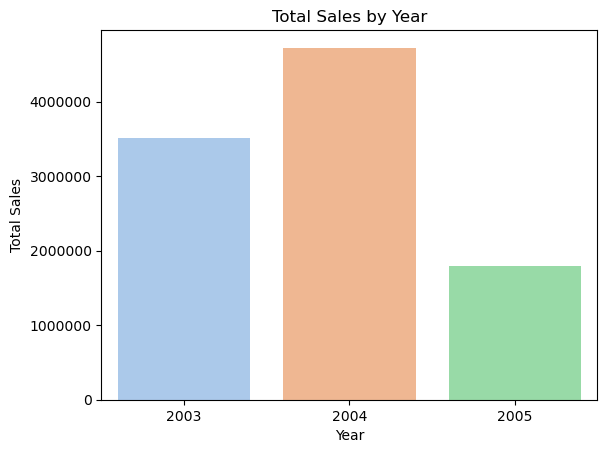

In [92]:
sns.barplot(x='YEAR_ID', y='SALES', data=df, estimator=sum, ci=None, palette='pastel')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.show()

In [102]:
#Sales over the month pivot table
df.pivot_table(values = 'SALES', index = 'YEAR_MONTH', aggfunc=sum, margins=True)


C:\Users\ACER\AppData\Local\Temp\ipykernel_13412\2579035691.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(values = 'SALES', index = 'YEAR_MONTH', aggfunc=sum, margins=True)


,SALES
YEAR_MONTH,
2003-01,129753.60
2003-02,140836.19
2003-03,174504.90
2003-04,201609.55
2003-05,192673.11
2003-06,168082.56
2003-07,187731.88
2003-08,197809.30
2003-09,263973.36


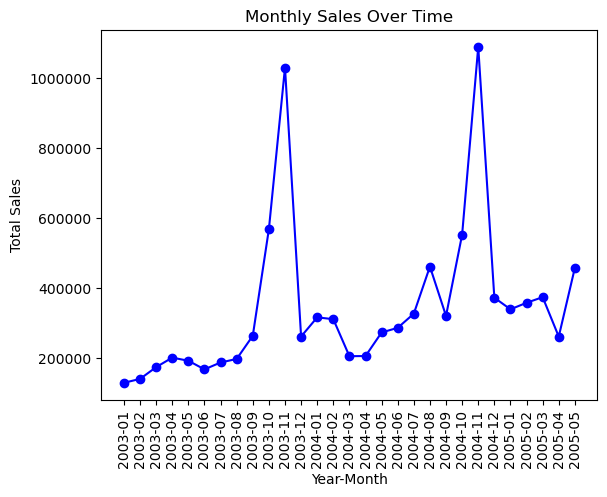

In [116]:
#extract year & month from order date column.
df['YEAR_MONTH'] = df['ORDERDATE_parsed'].dt.to_period('M')

#group sales by month
monthly_sales = df.groupby('YEAR_MONTH')['SALES'].sum()

#line chart for sales over the month
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-', color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Over Time')
plt.xticks(rotation=90)
plt.show()

In [126]:
#quantity order for each product
df.pivot_table(values = 'QUANTITYORDERED', index = 'YEAR_ID', columns='PRODUCTLINE', aggfunc=sum, fill_value=0, margins=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13412\847098699.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(values = 'QUANTITYORDERED', index = 'YEAR_ID', columns='PRODUCTLINE', aggfunc=sum, fill_value=0, margins=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13412\847098699.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(values = 'QUANTITYORDERED', index = 'YEAR_ID', columns='PRODUCTLINE', aggfunc=sum, fill_value=0, margins=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13412\847098699.py:1: FutureWarning: The provided callable <built-in function sum> is currently using D

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,All
YEAR_ID,,,,,,,,
2003,12473,3739,2996,2844,1000,4056,7504,34612
2004,15418,5690,5524,3937,1303,5002,9950,46824
2005,6101,2234,2207,1346,409,1719,3615,17631
All,33992,11663,10727,8127,2712,10777,21069,99067


C:\Users\ACER\AppData\Local\Temp\ipykernel_13412\1290432240.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_ordered.index, y=product_ordered.values, palette='pastel')


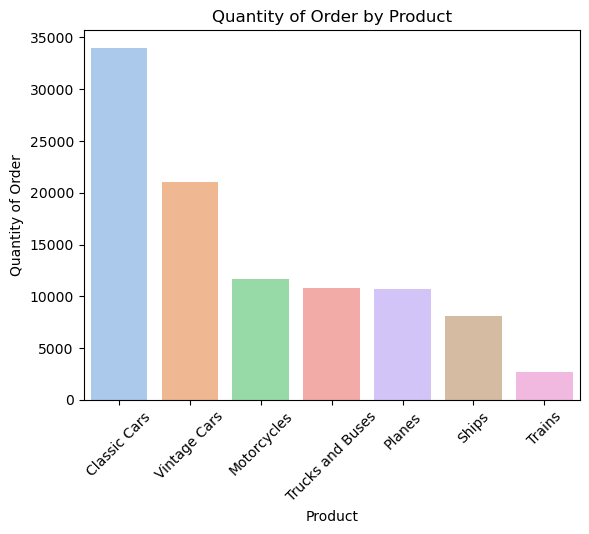

In [140]:
#sort
product_ordered = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)

# Plot the bar chart using Seaborn with the sorted data
sns.barplot(x=product_ordered.index, y=product_ordered.values, palette='pastel')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Product')
plt.ylabel('Quantity of Order')
plt.title('Quantity of Order by Product')
plt.xticks(rotation=45)
plt.show()

In [144]:
df.to_csv("Documents/PYTHON PRACTICE/Project - guided/5/Sample_sales_data_clean.csv")